In [1]:
import numpy as np
from math import ceil
from typing import List, Tuple
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
from tssparse import get_tsvalues, get_input_t
from torchmodels import LSTMTSSparseToTTE

In [4]:
# generate some arrival times with fixed intervals
max_t = 10
num_evtypes = 3
iats_d = {k: k+1 for k in range(num_evtypes)}

In [5]:
# actual data should look something like this
arrivaltimes = [
    [list(range(d, max_t, v)) for k, v in iats_d.items()]
    for d in range(5)
    for _ in range(10)
]

In [6]:
# arrival times for 0-th replicate
arrivaltimes[0]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 2, 4, 6, 8], [0, 3, 6, 9]]

In [7]:
loss_function = nn.MSELoss()
model = LSTMTSSparseToTTE(num_evtypes, max_t)
optimizer = optim.SGD(model.parameters(), lr=1)

In [8]:
def get_target(arrivaltimes, max_t):
    return torch.cat([
        torch.Tensor(
            get_input_t(t, arrivaltimes, training=False)
        )[
            ..., [1] # tse
        ].view(1, len(arrivaltimes), -1) 
        for t in range(max_t)
    ])

In [9]:
for epoch in range(100):
    model.zero_grad()
    loss = loss_function(model(arrivaltimes), get_target(arrivaltimes, max_t))
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        print ('epoch: {} loss: {}'.format(
            epoch, loss_function(model(arrivaltimes), get_target(arrivaltimes, max_t)).item()
        ))

epoch: 0 loss: 1.5766208171844482
epoch: 1 loss: 1.5632474422454834
epoch: 2 loss: 1.563510775566101
epoch: 3 loss: 1.5493534803390503
epoch: 4 loss: 1.548848032951355
epoch: 5 loss: 1.5460315942764282
epoch: 6 loss: 1.5348341464996338
epoch: 7 loss: 1.5479893684387207
epoch: 8 loss: 1.5155301094055176
epoch: 9 loss: 1.5153030157089233
epoch: 10 loss: 1.507109522819519
epoch: 11 loss: 1.5048314332962036
epoch: 12 loss: 1.4926522970199585
epoch: 13 loss: 1.5003689527511597
epoch: 14 loss: 1.4886854887008667
epoch: 15 loss: 1.4963390827178955
epoch: 16 loss: 1.4842122793197632
epoch: 17 loss: 1.4830766916275024
epoch: 18 loss: 1.4591808319091797
epoch: 19 loss: 1.460942268371582
epoch: 20 loss: 1.4542183876037598
epoch: 21 loss: 1.4437068700790405
epoch: 22 loss: 1.459079623222351
epoch: 23 loss: 1.4382505416870117
epoch: 24 loss: 1.4475611448287964
epoch: 25 loss: 1.42747962474823
epoch: 26 loss: 1.424939751625061
epoch: 27 loss: 1.4204779863357544
epoch: 28 loss: 1.4175611734390259
epo

In [10]:
import matplotlib.pyplot as plt

In [11]:
with torch.no_grad():
    pred = model(arrivaltimes).numpy()

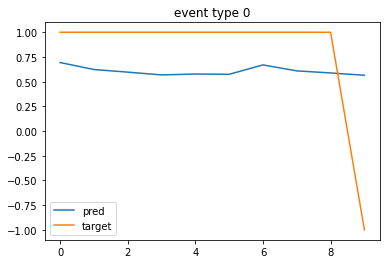

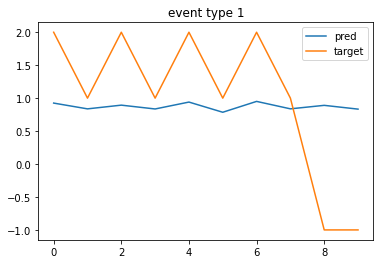

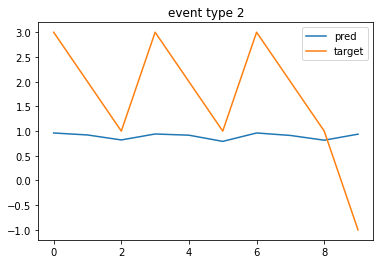

In [13]:
for i in range(num_evtypes):
    plt.plot(pred[:, 0, i], label='pred')
    plt.plot(get_target(arrivaltimes, max_t).numpy()[:, 0, i], label='target')
    plt.title('event type {}'.format(i))
    plt.legend()
    plt.show()